# Library: sp
Data: airport database. Source: .csv

In [59]:
# Import libraries
library(sp)
library(rgdal)
library(rgeos)

In [60]:
# Download data from url
url_csv <- "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
local_dest <- "./data/data_csv.csv"

download.file(url_csv, local_dest)

In [61]:
# Read data from .csv file, set header for data
raw_data_csv <- read.csv("./data/data_csv.csv",
                        header = FALSE,
                        col.names = c("id", "name", "city", "country", "iata", "icao", "latitude", "longitude", "altitude", "timezone", "tz", "dst", "type", "source"),
                        stringsAsFactors=FALSE)

In [62]:
# Display basic info about data - object data.frame
head(raw_data_csv)
# str(raw_data_csv)

id,name,city,country,iata,icao,latitude,longitude,altitude,timezone,tz,dst,type,source
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.392,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.726,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220,146,10,U,Pacific/Port_Moresby,airport,OurAirports
6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669,19,10,U,Pacific/Port_Moresby,airport,OurAirports


In [63]:
# Create Spatial object
spatial_data =`coordinates<-`(raw_data_csv, c("longitude", "latitude"))

In [90]:
# Info about Spatial object
class(spatial_data)
bbox(spatial_data)
spatial_data[1,]

[1] "SpatialPointsDataFrame"
attr(,"package")
[1] "sp"

,min,max
longitude,-179.877,179.951
latitude,-90.000,89.500


          coordinates id           name   city          country iata icao
1 (145.392, -6.08169)  1 Goroka Airport Goroka Papua New Guinea  GKA AYGA
  altitude timezone tz                  dst    type      source
1     5282       10  U Pacific/Port_Moresby airport OurAirports

In [66]:
# Get airports from Poland
pol_spatial_data = spatial_data[grep("Poland", spatial_data$country),]

# Describing Coordinate Reference System (CRS)
proj_pol_spatial_data = `proj4string<-`(pol_spatial_data, CRS("+proj=longlat +ellps=WGS84"))

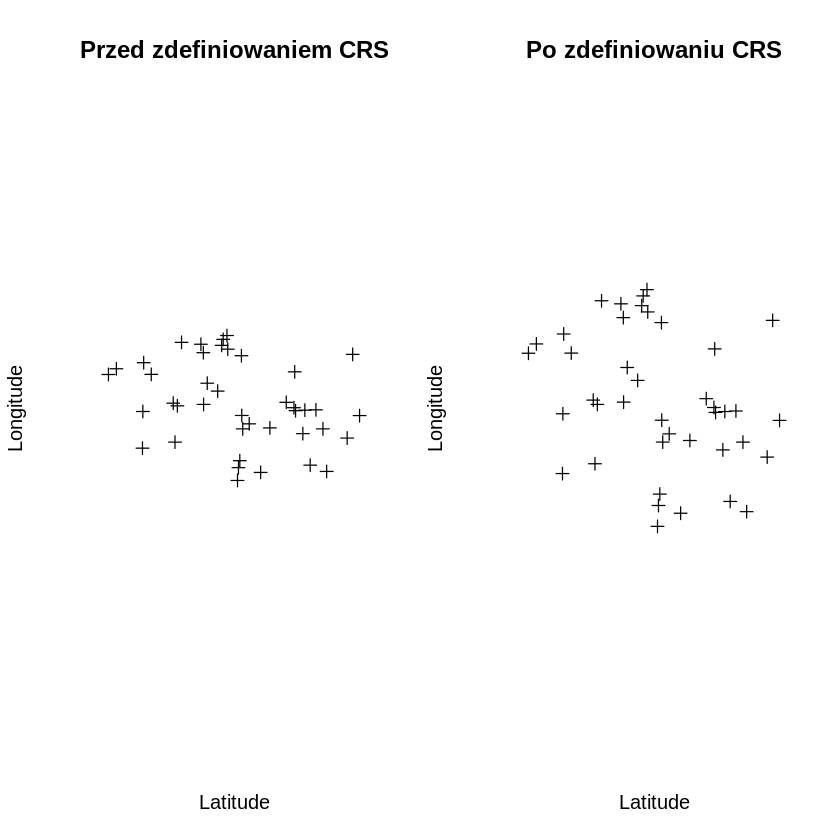

In [89]:
# Plot data with plot function
par(mfrow=c(1,2))
plot(pol_spatial_data["altitude"], main="Przed zdefiniowaniem CRS", xlab="Latitude", ylab="Longitude")
plot(proj_pol_spatial_data["altitude"], main="Po zdefiniowaniu CRS", xlab="Latitude", ylab="Longitude")


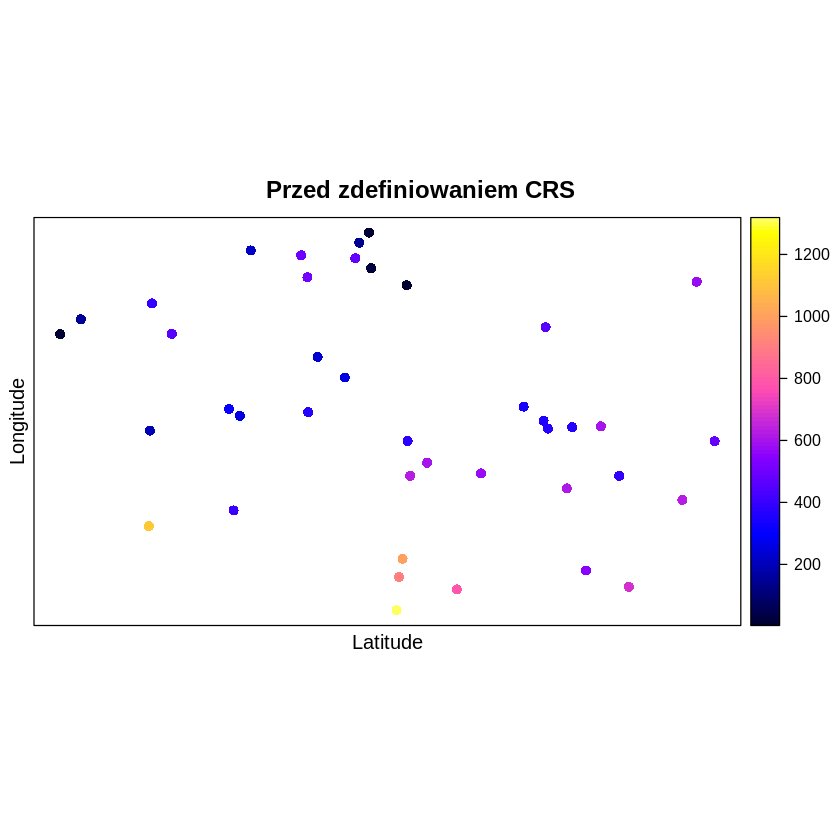

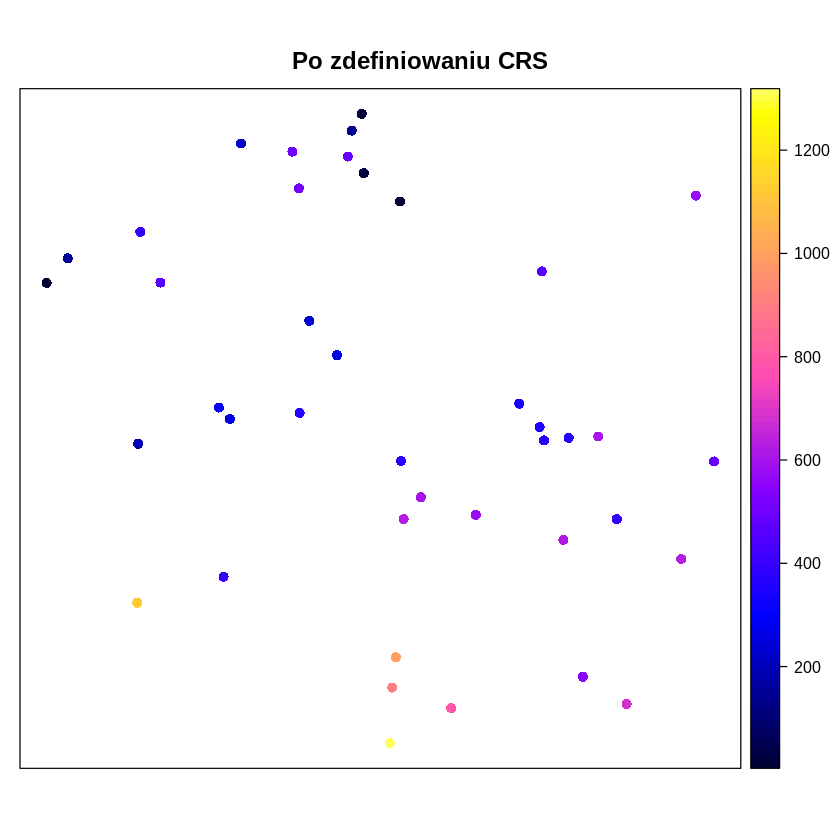

In [87]:
# Plot data with spplot function
par(mfrow=c(1,2))
spplot(pol_spatial_data, "altitude", colorkey=TRUE, main="Przed zdefiniowaniem CRS", xlab="Latitude", ylab="Longitude")
spplot(proj_pol_spatial_data, "altitude", colorkey=TRUE, main="Po zdefiniowaniu CRS", xlab="Latitude", ylab="Longitude")